In [3]:
import tweepy


consumer_key = 'RZPYKaAmpOeP6kQ2poFdLNgtV'
consumer_secret = 'ydFSiCisyTwcHQo4j3bNVyNWS7klGCEJRWlg0i1iVufEc2hUi1'
access_token = '802156710576037888-JNg427Hluqqj2bvoYPfCU4FTw8PRy2Z'
access_token_secret = 'fHMg4sABlb8QgN6ac9V3KGQrYENcDk2FnElDAFOLypooV'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

search_term = "#DonaldTrump -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since = '2020-04-09',
                   until = '2020-04-16').items(2000)

all_tweet = [tweet for tweet in tweets]

tweets_DonaldTrump = all_tweet

dict_DonaldTrump = []

for tweet in tweets_DonaldTrump:
    dict_DonaldTrump.append(tweet._json)
    
# with open('C:/Users/naisa/Desktop/Courses/Sem2/info_retrival/Assignment4/DonaldTrumpTweets.json', 'w') as f:
#     json.dump(dict_DonaldTrump, f)
    

KeyboardInterrupt: 

In [2]:
dict_DonaldTrump

[{'created_at': 'Wed Apr 15 23:59:58 +0000 2020',
  'id': 1250574621486673920,
  'id_str': '1250574621486673920',
  'text': 'In #TexasNursingHome, Republicans are experimenting on  #DementiaPatients to support Trump https://t.co/V8yg4mvQB2… https://t.co/SZVr9ymXC7',
  'truncated': True,
  'entities': {'hashtags': [{'text': 'TexasNursingHome', 'indices': [3, 20]},
    {'text': 'DementiaPatients', 'indices': [56, 73]}],
   'symbols': [],
   'user_mentions': [],
   'urls': [{'url': 'https://t.co/V8yg4mvQB2',
     'expanded_url': 'https://www.dailykos.com/story/2020/4/11/1936426/-In-a-Texas-nursing-home-Republicans-are-experimenting-on-dementia-patients-to-support-Trump',
     'display_url': 'dailykos.com/story/2020/4/1…',
     'indices': [91, 114]},
    {'url': 'https://t.co/SZVr9ymXC7',
     'expanded_url': 'https://twitter.com/i/web/status/1250574621486673920',
     'display_url': 'twitter.com/i/web/status/1…',
     'indices': [116, 139]}]},
  'metadata': {'iso_language_code': 'en', 're

In [1]:
import pandas as pd
import json
import time
import datetime
import matplotlib.pyplot as plt


with open('C:/Users/naisa/Desktop/Courses/Sem2/info_retrival/Assignment4/DonaldTrumpTweets.json', 'r') as f:
    tweetsDonaldTrump = json.load(f) 

filteredTweetsDonalTrump = []

for tweet in tweetsDonaldTrump:
    d = {}
    
    d['created_at'] = tweet['created_at']
    d['text'] = tweet['text']
    d['place'] = tweet['place']
    d['retweet_count'] = tweet['retweet_count']
    d['user_location'] = tweet['user']['location']
    
    filteredTweetsDonalTrump.append(d)
    
with open('C:/Users/naisa/Desktop/Courses/Sem2/info_retrival/Assignment4/JoeBidenTweets.json', 'r') as f:
    tweetsJoeBiden =json.load(f) 
    
filteredTweetsJoeBiden = []

for tweet in tweetsJoeBiden:
    d = {}
    
    d['created_at'] = tweet['created_at']
    d['text'] = tweet['text']
    d['place'] = tweet['place']
    d['retweet_count'] = tweet['retweet_count']
    d['user_location'] = tweet['user']['location']
    
    filteredTweetsJoeBiden.append(d)
    
dataDonaldTrump = pd.DataFrame(filteredTweetsDonalTrump)

dataJoeBiden = pd.DataFrame(filteredTweetsJoeBiden)


In [7]:
dataDonaldTrump.head()


created_at  \
0  Wed Apr 15 23:59:58 +0000 2020   
1  Wed Apr 15 23:59:03 +0000 2020   
2  Wed Apr 15 23:58:39 +0000 2020   
3  Wed Apr 15 23:57:58 +0000 2020   
4  Wed Apr 15 23:56:27 +0000 2020   

                                                text place  retweet_count  \
0  In #TexasNursingHome, Republicans are experime...  None              0   
1  @realDonaldTrump @POTUS I’m donating that #Sti...  None              0   
2  @realdonaldtrump VS Dr. Fauci. Who are you wit...  None              1   
3  Criticized for Pandemic Response, Trump Tries ...  None              0   
4  #DonaldTrump is leading spitefully.  Is he pra...  None              0   

               user_location  
0                             
1                             
2                             
3                  Boston MA  
4  Langley, British Columbia

In [8]:
dataJoeBiden.head()

created_at  \
0  Wed Apr 15 23:59:35 +0000 2020   
1  Wed Apr 15 23:59:32 +0000 2020   
2  Wed Apr 15 23:59:03 +0000 2020   
3  Wed Apr 15 23:55:00 +0000 2020   
4  Wed Apr 15 23:54:19 +0000 2020   

                                                text  \
0  Thought a lot about #TaraReade and her story a...   
1  @mehdirhasan needs to STFU. #JoeBiden is a dem...   
2  @realDonaldTrump @POTUS I’m donating that #Sti...   
3  IMO: @JoeBiden will need a running mate who un...   
4  @JoyAnnReid on your show today you forgot to a...   

                                               place  retweet_count  \
0                                               None              0   
1                                               None              0   
2                                               None              0   
3                                               None              0   
4  {'id': '3f5897b87d2bf56c', 'url': 'https://api...              0   

    user_location  
0                  
1                  
2                  
3                  
4  Middletown, DE

In [2]:
dataDonaldTrump['timestamp'] = dataDonaldTrump['created_at'].map(lambda x : time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(x,'%a %b %d %H:%M:%S +0000 %Y')))
dataDonaldTrump['timestamp'] = pd.to_datetime(dataDonaldTrump['timestamp'], infer_datetime_format = True)
dataDonaldTrump['hr'] =  dataDonaldTrump['timestamp'].dt.hour

groupedDonaldTrump = dataDonaldTrump[['text', 'hr']].groupby(['hr']).agg('count').reset_index()

No handles with labels found to put in legend.


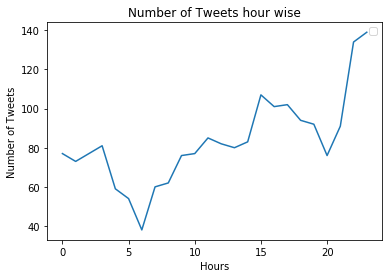

In [11]:
plt.plot(groupedDonaldTrump['hr'], groupedDonaldTrump['text'])
plt.legend()
plt.xlabel('Hours')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets hour wise')
plt.show()


In [3]:
import nltk
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

scores = np.zeros(len(dataDonaldTrump['text']))

for i, t in enumerate(dataDonaldTrump['text']):
    polarity = analyzer.polarity_scores(t)
    scores[i] = polarity['compound']

most_positive = np.argmax(scores)
most_negative = np.argmin(scores)

print('{0:6.3f} : "{1}"'.format(scores[most_positive], dataDonaldTrump['text'][most_positive]))

print('{0:6.3f} : "{1}"'.format(scores[most_negative], dataDonaldTrump['text'][most_negative]))

dataDonaldTrump['scores'] = scores


 0.950 : "Seeking for a lovely and adorable sugar babe,a baby I can take good care of and make her happy always...… https://t.co/i9N4edqniT"
-0.957 : "Poor poor stupid #DonaldTrump. He to stupid to realize that Blaming the WHO had absolutely no political upside. What a dumb-ass."


In [4]:

scores = np.zeros(len(dataJoeBiden['text']))

for i, t in enumerate(dataJoeBiden['text']):
    polarity = analyzer.polarity_scores(t)
    scores[i] = polarity['compound']

most_positive = np.argmax(scores)
most_negative = np.argmin(scores)

print('{0:6.3f} : "{1}"'.format(scores[most_positive], dataJoeBiden['text'][most_positive]))

print('{0:6.3f} : "{1}"'.format(scores[most_negative], dataJoeBiden['text'][most_negative]))

dataJoeBiden['scores'] = scores

 0.938 : "@ewarren @JoeBiden What a fantastic endorsement, Senator!! Wow, so spot on and so glad you’re in this with us! #LetsGetToWork  #JoeBiden"
-0.955 : "#JoeBiden is a rapist #JoeBiden is a cheater #JoeBiden is establishments bitch right now. I would have said whore b… https://t.co/3OM86hBIff"


In [7]:
dataDonaldTrump = dataDonaldTrump.sort_values('retweet_count', ascending = False)[5:]
dataDonaldTrump[['retweet_count','text','scores']].head()

retweet_count                                               text  scores
393              81  The evidence for the defence in the case again...  0.1027
221              81  "Trump has committed a crime against humanity.... -0.6124
1019             70  This is what they think is news? #Coronavirus ...  0.0000
296              61  And now, the award for today's worst idea. #Co... -0.1531
1564             60  US President #DonaldTrump instructed administr... -0.6486

In [8]:
dataJoeBiden = dataJoeBiden.sort_values('retweet_count', ascending = False)[5:]
dataJoeBiden[['retweet_count','text','scores']].head()

retweet_count                                               text  scores
410              84  ⁦@JoeBiden⁩ we are not playing around ⁦@Kamala... -0.5972
1661             67  #Bernie is on IG LIVE with the ex-stripper who... -0.7906
157              62  #JoeBiden Belives in SCIENCE and CLIMATE CHANG...  0.0000
874              59  Bannon: #JoeBiden is totally compromised by th...  0.4019
1074             59  This ad needs to go viral.\n\nRetweet please f...  0.3182

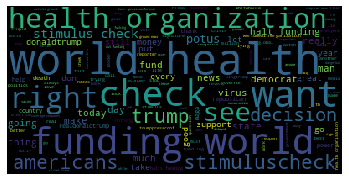

In [11]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import re
from nltk.stem import PorterStemmer

# stemmer = PorterStemmer()

words = ''.join(dataDonaldTrump['text'])
words = words.lower()

no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                            ])

stop_words = STOPWORDS

new_stopwords = ['DonaldTrump', 'Donald Trump', 'Trump', 'Donald','President', 'US','know','name','now','will','amp'
                'america','need','think','time','china','said','got','usa','one','covid19','covid','coronavirus','covid',
                'pandemic','new','say','people','american','america','says']

# for i in new_stopwords:
#     stop_words.add(i)
    
# word_tokens = re.split('[^a-zA-Z]', no_urls_no_tags)
# filtered_tokens = [w for w in word_tokens if (w not in stop_words) and not len(w) <= 1]

# stemmer = PorterStemmer()

# for i in range(len(filtered_tokens)):
# #    print(filtered_tokens[i])
#     filtered_tokens[i] = stemmer.stem(filtered_tokens[i])
    
wordcloud = WordCloud(
                      stopwords=stop_words,
#                       background_color='black',
                     ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

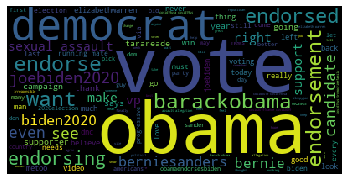

In [9]:

words = ''.join(dataJoeBiden['text'])
words = words.lower()

no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                            ])

stop_words = STOPWORDS

new_stopwords = ['joebiden', 'joe', 'biden', 'will','amp', 'say','know','name','now']

for i in new_stopwords:
    stop_words.add(i)
    
wordcloud = WordCloud(
                      stopwords=stop_words,
                      background_color='black',
                     ).generate(no_urls_no_tags)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [2]:
import tweepy
import json
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

with open('C:/Users/naisa/Desktop/Courses/Sem2/info_retrival/Assignment4/DonaldTrumpTweets.json', 'r') as f:
    tweetsDonaldTrump = json.load(f) 

filteredTweetsDonalTrump = []

for tweet in tweetsDonaldTrump:
    d = {}
    
    d['created_at'] = tweet['created_at']
    d['text'] = tweet['text']
    d['place'] = tweet['place']
    d['retweet_count'] = tweet['retweet_count']
    d['user_location'] = tweet['user']['location']
    
    filteredTweetsDonalTrump.append(d)
    
with open('C:/Users/naisa/Desktop/Courses/Sem2/info_retrival/Assignment4/JoeBidenTweets.json', 'r') as f:
    tweetsJoeBiden =json.load(f) 
    
filteredTweetsJoeBiden = []

for tweet in tweetsJoeBiden:
    d = {}
    
    d['created_at'] = tweet['created_at']
    d['text'] = tweet['text']
    d['place'] = tweet['place']
    d['retweet_count'] = tweet['retweet_count']
    d['user_location'] = tweet['user']['location']
    
    filteredTweetsJoeBiden.append(d)
    
dataDonaldTrump = pd.DataFrame(filteredTweetsDonalTrump)

dataJoeBiden = pd.DataFrame(filteredTweetsJoeBiden)



In [6]:
dataDonaldTrump['text'][15]

'Coronavirus: US to halt funding to WHO, says Trump\n#WHO #DonaldTrump #COVID19 #science #funding #research\nhttps://t.co/inNrfpHe9i'

In [7]:
dataDonaldTrump['text'][35]

'@Strandjunker #DonaldTrump wouldn\'t just "let us die" he would "kill is" if it meant keeping him powerful… https://t.co/nzqZyfFi7B'

In [8]:
dataJoeBiden['text'][15]

"@joyannreid; @K_JeanPierre, #Warren's supporters would have no issue moving over to #JoeBiden, so it matters little… https://t.co/kIfMnz5RYW"

In [9]:
dataJoeBiden['text'][35]

"When #Trump losses in the #2020Election - I wager he won't even be on stage when #JoeBiden is sworn in as President… https://t.co/ofrlGd5FoS"

In [10]:
dataDonaldTrump['timestamp'] = dataDonaldTrump['created_at'].map(lambda x : time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(x,'%a %b %d %H:%M:%S +0000 %Y')))
dataDonaldTrump['timestamp'] = pd.to_datetime(dataDonaldTrump['timestamp'], infer_datetime_format = True)
print("Earliest tweet extracted for #DonaldTrump is at : ", dataDonaldTrump.timestamp.min())
print("Latest tweet extracted for #DonaldTrump is at : ", dataDonaldTrump.timestamp.max())

dataJoeBiden['timestamp'] = dataJoeBiden['created_at'].map(lambda x : time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(x,'%a %b %d %H:%M:%S +0000 %Y')))
dataJoeBiden['timestamp'] = pd.to_datetime(dataJoeBiden['timestamp'], infer_datetime_format = True)
print("Earliest tweet extracted for #JoeBiden is at : ", dataJoeBiden.timestamp.min())
print("Latest tweet extracted for #JoeBiden is at : ", dataJoeBiden.timestamp.max())


Earliest tweet extracted for #DonaldTrump is at :  2020-04-14 23:31:24
Latest tweet extracted for #DonaldTrump is at :  2020-04-15 23:59:58
Earliest tweet extracted for #JoeBiden is at :  2020-04-14 22:40:12
Latest tweet extracted for #JoeBiden is at :  2020-04-15 23:59:35


No handles with labels found to put in legend.


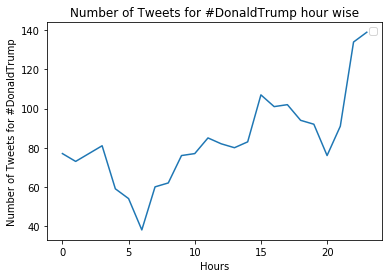

In [11]:
dataDonaldTrump['hr'] =  dataDonaldTrump['timestamp'].dt.hour
groupedDonaldTrump = dataDonaldTrump[['text', 'hr']].groupby(['hr']).agg('count').reset_index()

dataJoeBiden['hr'] =  dataJoeBiden['timestamp'].dt.hour
groupedJoeBiden = dataJoeBiden[['text', 'hr']].groupby(['hr']).agg('count').reset_index()

plt.plot(groupedDonaldTrump['hr'], groupedDonaldTrump['text'])
plt.legend()
plt.xlabel('Hours')
plt.ylabel('Number of Tweets for #DonaldTrump')
plt.title('Number of Tweets for #DonaldTrump hour wise')
plt.show()

No handles with labels found to put in legend.


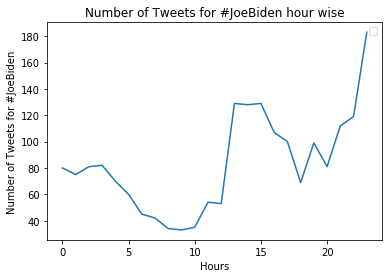

In [12]:
plt.plot(groupedJoeBiden['hr'], groupedJoeBiden['text'])
plt.legend()
plt.xlabel('Hours')
plt.ylabel('Number of Tweets for #JoeBiden')
plt.title('Number of Tweets for #JoeBiden hour wise')
plt.show()


In [16]:
analyzer = SentimentIntensityAnalyzer()

scores = np.zeros(len(dataDonaldTrump['text']))
for i, t in enumerate(dataDonaldTrump['text']):
    polarity = analyzer.polarity_scores(t)
    scores[i] = polarity['compound']
most_positive = np.argmax(scores)
most_negative = np.argmin(scores)
print('\n Most positive score and tweet for #DonaldTrump: ','{0:6.3f} : "{1}"'.format(scores[most_positive], dataDonaldTrump['text'][most_positive]))
print('\n Most negative score and tweet for #DonaldTrump: ','{0:6.3f} : "{1}"'.format(scores[most_negative], dataDonaldTrump['text'][most_negative]))
dataDonaldTrump['scores'] = scores

scores = np.zeros(len(dataJoeBiden['text']))
for i, t in enumerate(dataJoeBiden['text']):
    polarity = analyzer.polarity_scores(t)
    scores[i] = polarity['compound']
most_positive = np.argmax(scores)
most_negative = np.argmin(scores)
print('\n Most positive score and tweet for #JoeBiden: ','{0:6.3f} : "{1}"'.format(scores[most_positive], dataJoeBiden['text'][most_positive]))
print('\n Most negative score and tweet for #JoeBiden: ','{0:6.3f} : "{1}"'.format(scores[most_negative], dataJoeBiden['text'][most_negative]))
dataJoeBiden['scores'] = scores


 Most positive score and tweet for #DonaldTrump:   0.950 : "Seeking for a lovely and adorable sugar babe,a baby I can take good care of and make her happy always...… https://t.co/i9N4edqniT"

 Most negative score and tweet for #DonaldTrump:  -0.957 : "Poor poor stupid #DonaldTrump. He to stupid to realize that Blaming the WHO had absolutely no political upside. What a dumb-ass."

 Most positive score and tweet for #JoeBiden:   0.938 : "@ewarren @JoeBiden What a fantastic endorsement, Senator!! Wow, so spot on and so glad you’re in this with us! #LetsGetToWork  #JoeBiden"

 Most negative score and tweet for #JoeBiden:  -0.955 : "#JoeBiden is a rapist #JoeBiden is a cheater #JoeBiden is establishments bitch right now. I would have said whore b… https://t.co/3OM86hBIff"


In [17]:

n, p = 0, 0
print("Total positive sentiment for #DonaldTrump : ", sum([p + i for i in dataDonaldTrump['scores'] if i > 0]))
print("\nTotal negative sentiment for #DonaldTrump : ", sum([n + i for i in dataDonaldTrump['scores'] if i < 0]))
n, p = 0, 0 
print("\n Total tweet count for negative sentiment for #DonaldTrump : ", sum([n + 1 for i in dataDonaldTrump['scores'] if i < 0]))
print("\nTotal tweet count for positive sentiment for #DonaldTrump : ", sum([p + 1 for i in dataDonaldTrump['scores'] if i > 0]))
n = 0
print("\nTotal tweet count for neutral sentiment for #DonaldTrump : ", sum([n + 1 for i in dataDonaldTrump['scores'] if i == 0]))

n, p = 0, 0
print("\nTotal positive sentiment for #JoeBiden : ", sum([p + i for i in dataJoeBiden['scores'] if i > 0]))
print("\nTotal negative sentiment for #JoeBiden : ", sum([n + i for i in dataJoeBiden['scores'] if i < 0]))
n, p = 0, 0 
print("\nTotal tweet count for negative sentiment for #JoeBiden : ", sum([n + 1 for i in dataJoeBiden['scores'] if i < 0]))
print("\nTotal tweet count for positive sentiment for #JoeBiden : ", sum([p + 1 for i in dataJoeBiden['scores'] if i > 0]))
n = 0
print("\nTotal tweet count for neutral sentiment for #JoeBiden : ", sum([n + 1 for i in dataJoeBiden['scores'] if i == 0]))


Total positive sentiment for #DonaldTrump :  264.37720000000013

Total negative sentiment for #DonaldTrump :  -349.23339999999956

 Total tweet count for negative sentiment for #DonaldTrump :  735

Total tweet count for positive sentiment for #DonaldTrump :  571

Total tweet count for neutral sentiment for #DonaldTrump :  694

Total positive sentiment for #JoeBiden :  379.3479999999994

Total negative sentiment for #JoeBiden :  -250.41899999999993

Total tweet count for negative sentiment for #JoeBiden :  551

Total tweet count for positive sentiment for #JoeBiden :  836

Total tweet count for neutral sentiment for #JoeBiden :  613


In [31]:
dataDonaldTrump = dataDonaldTrump.sort_values('retweet_count', ascending = False)
dataDonaldTrump[['retweet_count','text','scores']].head()

retweet_count                                               text  scores
1545             13  US President #DonaldTrump says some US states ...  0.0000
382              13  Donald Trump says deciding when to reopen the ...  0.0000
804              12  Indian fake journalists need taste of #DonaldT... -0.6093
41               12  President Trump has said he doesn't like shaki... -0.1511
283              12  One like=One vote. Trump 2020‼️‼️ #GOP #Trump ...  0.0000

In [32]:
dataJoeBiden = dataJoeBiden.sort_values('retweet_count', ascending = False)
dataJoeBiden[['retweet_count','text','scores']].head()

retweet_count                                               text  scores
943              16  Vote Joe Biden Come with me if you want to liv...  0.0772
986              16  Thank you President Obama for your moving word...  0.5346
161              16  When asked if she would accept an offer to run...  0.7506
1448             16  #How2020CouldGetWorse \n\nBy electing this dud...  0.0000
1515             15  Yep. This. Obama's legacy is a Heritage Founda...  0.2960

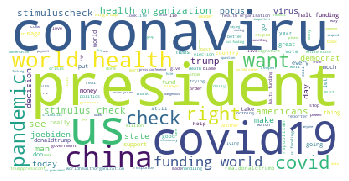

In [33]:

wordsTrump = ''.join(dataDonaldTrump['text'])
wordsTrump = wordsTrump.lower()

no_urls_no_tags_Trump = " ".join([word for word in wordsTrump.split()
                            if 'http' not in word
                                and not word.startswith('@')
                            ])

stop_words = STOPWORDS

new_stopwords = ['donaldtrump', 'donald trump', 'trump', 'donald','know','name','now','will','amp', 'america',
                'need','think','time','said','got','usa','one','new','say','people','american','america','says']

for i in new_stopwords:
    stop_words.add(i)

wordcloud = WordCloud(
                      stopwords=stop_words,
                      background_color='white',
                     ).generate(no_urls_no_tags_Trump)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

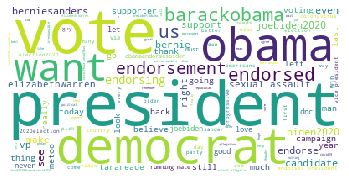

In [34]:
      
wordsBiden = ''.join(dataJoeBiden['text'])
wordsBiden = wordsBiden.lower()

no_urls_no_tags_Biden = " ".join([word for word in wordsBiden.split()
                            if 'http' not in word
                                and not word.startswith('@')
                            ])

stop_words = STOPWORDS

new_stopwords = ['joebiden', 'joe', 'biden', 'will','amp', 'say','know','name','now']

for i in new_stopwords:
    stop_words.add(i)
    
wordcloud = WordCloud(
                      stopwords=stop_words,
                      background_color='white',
                     ).generate(no_urls_no_tags_Biden)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()
